In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(16, (3, 3), input_shape = (512,512, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [12]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [19]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/LEAF DISEASE/data/train',
                                                 target_size = (512,512),
                                                 batch_size = 8,
                                                 class_mode = 'binary')

Found 882 images belonging to 2 classes.


In [17]:
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/LEAF DISEASE/data/val',
                                            target_size = (512,512),
                                            batch_size = 8,
                                            class_mode = 'binary')

Found 360 images belonging to 2 classes.


In [18]:
model.fit(training_set,
                         steps_per_epoch = 116,
                         epochs = 100,
                         validation_data = val_set,
                         validation_steps = 45)

Epoch 1/100
111/116 [===========================>..] - ETA: 11s - loss: 0.7071 - accuracy: 0.6327

116/116 [==============================] - 369s 3s/step - loss: 0.7071 - accuracy: 0.6327 - val_loss: 2.0949 - val_accuracy: 0.8000


In [20]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
model.save('model.h5')

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model.h5')

In [24]:
img=image.load_img(r"/content/drive/MyDrive/LEAF DISEASE/data/train/Corn Healthy/Healthy_10.jpg")

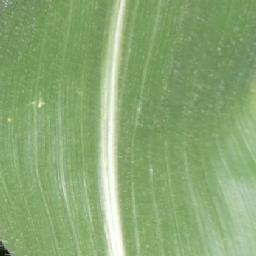

In [25]:
img

In [26]:
x=image.img_to_array(img)

In [27]:
x

array([[[118., 135., 103.],
        [127., 143., 114.],
        [144., 160., 131.],
        ...,
        [124., 158.,  98.],
        [120., 154.,  94.],
        [119., 153.,  93.]],

       [[116., 133., 101.],
        [116., 132., 103.],
        [143., 159., 130.],
        ...,
        [121., 155.,  95.],
        [119., 153.,  93.],
        [119., 153.,  93.]],

       [[119., 136., 104.],
        [121., 137., 108.],
        [130., 146., 117.],
        ...,
        [118., 152.,  92.],
        [117., 151.,  91.],
        [118., 152.,  92.]],

       ...,

       [[ 11.,  25.,   0.],
        [ 19.,  33.,   8.],
        [ 22.,  34.,  12.],
        ...,
        [169., 197., 157.],
        [171., 199., 159.],
        [173., 201., 161.]],

       [[ 20.,  34.,   8.],
        [ 21.,  35.,   9.],
        [ 24.,  36.,  12.],
        ...,
        [167., 195., 155.],
        [170., 198., 158.],
        [173., 201., 161.]],

       [[ 18.,  32.,   6.],
        [ 11.,  25.,   0.],
        [ 13.,  

In [29]:
x=np.expand_dims(x,axis=0)

In [30]:
x

array([[[[118., 135., 103.],
         [127., 143., 114.],
         [144., 160., 131.],
         ...,
         [124., 158.,  98.],
         [120., 154.,  94.],
         [119., 153.,  93.]],

        [[116., 133., 101.],
         [116., 132., 103.],
         [143., 159., 130.],
         ...,
         [121., 155.,  95.],
         [119., 153.,  93.],
         [119., 153.,  93.]],

        [[119., 136., 104.],
         [121., 137., 108.],
         [130., 146., 117.],
         ...,
         [118., 152.,  92.],
         [117., 151.,  91.],
         [118., 152.,  92.]],

        ...,

        [[ 11.,  25.,   0.],
         [ 19.,  33.,   8.],
         [ 22.,  34.,  12.],
         ...,
         [169., 197., 157.],
         [171., 199., 159.],
         [173., 201., 161.]],

        [[ 20.,  34.,   8.],
         [ 21.,  35.,   9.],
         [ 24.,  36.,  12.],
         ...,
         [167., 195., 155.],
         [170., 198., 158.],
         [173., 201., 161.]],

        [[ 18.,  32.,   6.],
       

In [32]:
training_set.class_indices

{'Corn Affected': 0, 'Corn Healthy': 1}